Importing data from Yahoo Finance

In [1]:
import yfinance as yf

# Download Apple stock data
data = yf.download("AAPL", start="2010-01-01", end="2024-12-31", group_by="ticker")
# Flatten MultiIndex columns if they exist
data.columns = [col[1] if isinstance(col, tuple) else col for col in data.columns]
print(data)


/tmp/ipython-input-1-3072680559.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2010-01-01", end="2024-12-31", group_by="ticker")
[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close     Volume
Date                                                                 
2010-01-04    6.414464    6.446622    6.382907    6.431895  493729600
2010-01-05    6.449628    6.479382    6.409054    6.443016  601904800
2010-01-06    6.443015    6.468561    6.333918    6.340530  552160000
2010-01-07    6.363975    6.371489    6.282828    6.328811  477131200
2010-01-08    6.320395    6.371488    6.283129    6.370886  447610800
...                ...         ...         ...         ...        ...
2024-12-23  254.156919  255.034791  252.840088  254.655716   40858800
2024-12-24  254.875189  257.588630  254.675658  257.578674   23234700
2024-12-26  257.568678  259.474086  257.010028  258.396667   27237100
2024-12-27  257.209530  258.077462  252.451019  254.974930   42355300
2024-12-30  251.623005  252.889953  250.146571  251.593079   35557500

[3773 rows x 5 columns]


Converting in DataFrame

In [2]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data)
df

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,6.414464,6.446622,6.382907,6.431895,493729600
2010-01-05,6.449628,6.479382,6.409054,6.443016,601904800
2010-01-06,6.443015,6.468561,6.333918,6.340530,552160000
2010-01-07,6.363975,6.371489,6.282828,6.328811,477131200
2010-01-08,6.320395,6.371488,6.283129,6.370886,447610800
...,...,...,...,...,...
2024-12-23,254.156919,255.034791,252.840088,254.655716,40858800
2024-12-24,254.875189,257.588630,254.675658,257.578674,23234700
2024-12-26,257.568678,259.474086,257.010028,258.396667,27237100


In [3]:
df.sort_index(inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,6.414464,6.446622,6.382907,6.431895,493729600
2010-01-05,6.449628,6.479382,6.409054,6.443016,601904800
2010-01-06,6.443015,6.468561,6.333918,6.340530,552160000
2010-01-07,6.363975,6.371489,6.282828,6.328811,477131200
2010-01-08,6.320395,6.371488,6.283129,6.370886,447610800


Saving data as csv file

In [ ]:
df.to_csv("C:/Workspace/Projects/Stock price prediction/data/apple_quandl.csv")


Data Summary

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3773 entries, 2010-01-04 to 2024-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3773 non-null   float64
 1   High    3773 non-null   float64
 2   Low     3773 non-null   float64
 3   Close   3773 non-null   float64
 4   Volume  3773 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.9 KB


In [6]:
df.describe()

,Open,High,Low,Close,Volume
count,3773.000000,3773.000000,3773.000000,3773.000000,3.773000e+03
mean,67.328267,68.038019,66.661499,67.384922,2.299696e+08
std,65.377731,66.066089,64.759818,65.458097,2.180792e+08
min,5.781522,5.890619,5.717810,5.771906,2.323470e+07
25%,17.438644,17.616178,17.293180,17.438065,8.492380e+07
50%,35.290557,35.654110,34.916142,35.238155,1.405608e+08
75%,126.025083,127.807660,124.474425,126.721436,3.081512e+08
max,257.568678,259.474086,257.010028,258.396667,1.880998e+09


Checking for null values

In [7]:
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


Data Normalization

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_value = scaler.fit_transform(df[df.columns])

In [9]:
df_scaled = pd.DataFrame(scaler_value, columns=df.columns, index=df.index)
df_scaled

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,0.002514,0.002193,0.002647,0.002613,0.253259
2010-01-05,0.002653,0.002322,0.002751,0.002657,0.311488
2010-01-06,0.002627,0.002279,0.002452,0.002251,0.284711
2010-01-07,0.002313,0.001896,0.002248,0.002204,0.244324
2010-01-08,0.002140,0.001896,0.002250,0.002371,0.228434
...,...,...,...,...,...
2024-12-23,0.986450,0.982494,0.983406,0.985192,0.009487
2024-12-24,0.989303,0.992565,0.990711,0.996762,0.000000
2024-12-26,1.000000,1.000000,1.000000,1.000000,0.002154


Importing Libraries

In [10]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler


Data Visualization

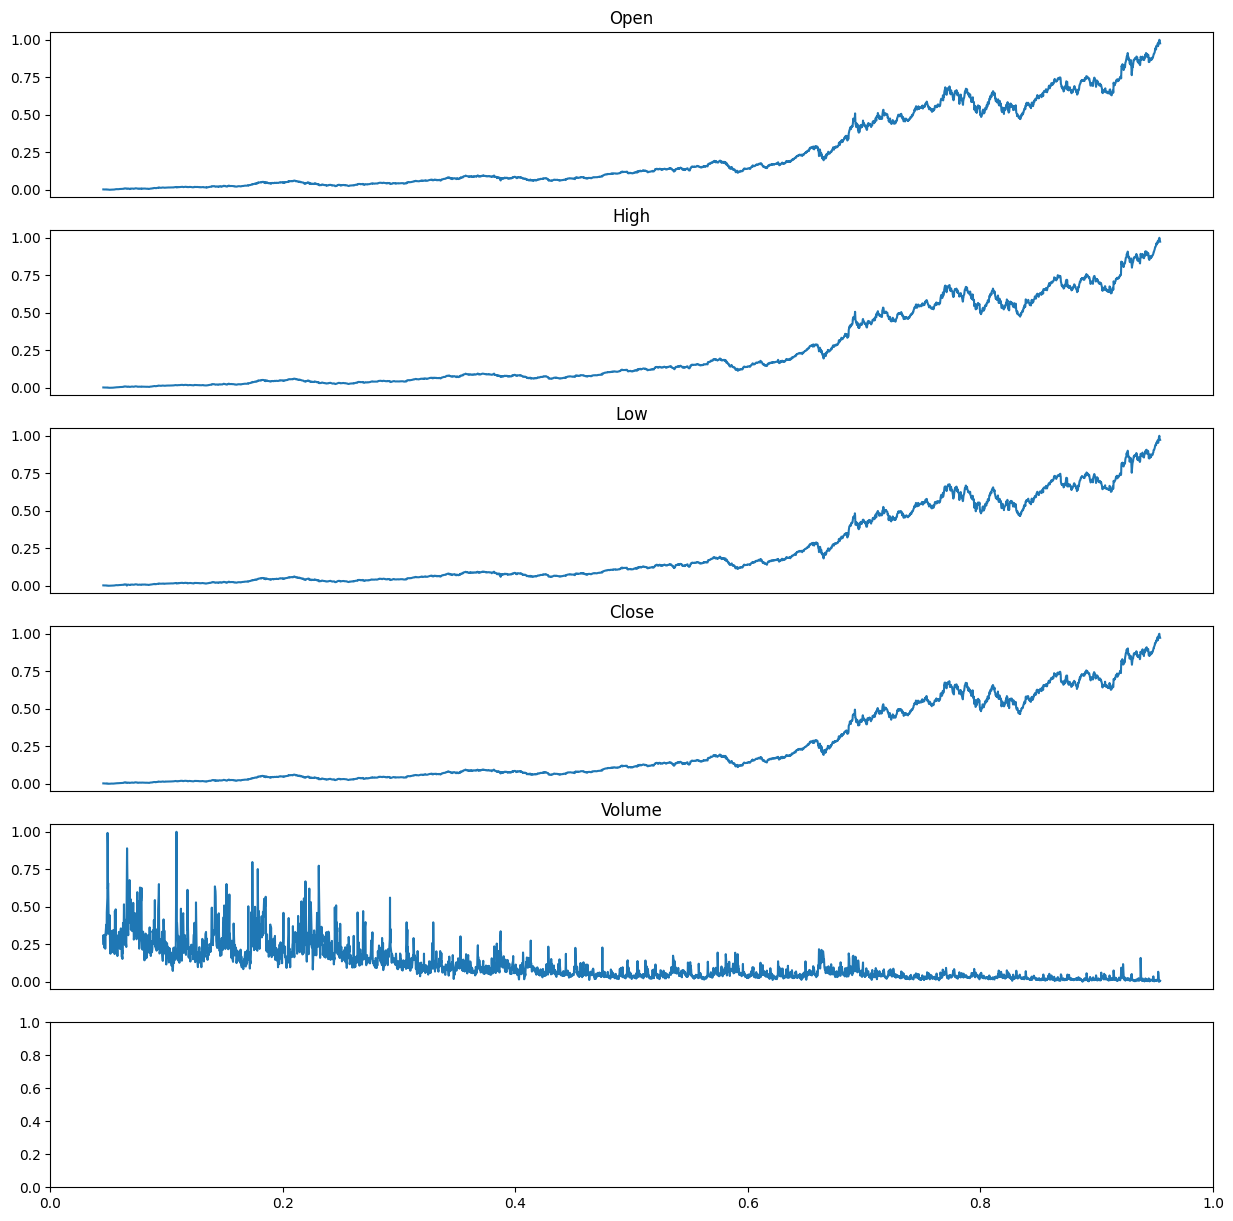

In [11]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(6, figsize=(15, 15))

for ax, col in zip(axes, df.columns):
    ax.plot(df_scaled[col])
    ax.set_title(col)
    ax.xaxis.set_visible(False)  # or ax.axes.xaxis.set_visible(False) if needed


Creating Sequence

In [12]:
def create_sequence(data, window_size):
    x= []
    y= []

    for i in range(window_size, len(data)):
        x.append(data.iloc[i - window_size:i].values)
        y.append(data.iloc[i].values)

    return np.array(x), np.array(y)

In [13]:
windowsize = 60
x, y = create_sequence(df_scaled, window_size=windowsize)

In [14]:
x.shape, y.shape

((3713, 60, 5), (3713, 5))

In [15]:
x

array([[[0.0025138 , 0.00219258, 0.00264671, 0.00261253, 0.2532588 ],
        [0.00265345, 0.00232177, 0.00275076, 0.00265655, 0.31148753],
        [0.00262719, 0.0022791 , 0.00245176, 0.00225087, 0.28471081],
        ...,
        [0.00436633, 0.00426073, 0.00458063, 0.00462191, 0.33246458],
        [0.00484974, 0.00448828, 0.00494779, 0.00479916, 0.278566  ],
        [0.00527945, 0.00491613, 0.00526233, 0.00521079, 0.27133451]],

       [[0.00265345, 0.00232177, 0.00275076, 0.00265655, 0.31148753],
        [0.00262719, 0.0022791 , 0.00245176, 0.00225087, 0.28471081],
        [0.00231327, 0.0018963 , 0.00224845, 0.00220448, 0.24432418],
        ...,
        [0.00484974, 0.00448828, 0.00494779, 0.00479916, 0.278566  ],
        [0.00527945, 0.00491613, 0.00526233, 0.00521079, 0.27133451],
        [0.00514696, 0.00481302, 0.00528745, 0.00510966, 0.21930937]],

       [[0.00262719, 0.0022791 , 0.00245176, 0.00225087, 0.28471081],
        [0.00231327, 0.0018963 , 0.00224845, 0.00220448, 0.2

In [16]:
y

array([[0.00514696, 0.00481302, 0.00528745, 0.00510966, 0.21930937],
       [0.00537613, 0.00506427, 0.00508293, 0.00522506, 0.31215521],
       [0.00508609, 0.00503821, 0.00532453, 0.00552487, 0.35595111],
       ...,
       [1.        , 1.        , 1.        , 1.        , 0.00215442],
       [0.9985736 , 0.99449245, 0.98185774, 0.98645526, 0.01029227],
       [0.97638611, 0.97403564, 0.97268735, 0.9730684 , 0.00663314]])

Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, y.shape

((2599, 60, 5), (3713, 5))

In [18]:
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.reshape(-1, 1))

In [19]:
x_train.shape[1], x_train.shape[2]

(60, 5)

In [20]:
y_train.shape[1]

5

Creating LSTM

In [21]:
model = Sequential()

# First LSTM Layer
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.3))

# Second LSTM Layer
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM Layer
model.add(LSTM(50, return_sequences=False, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(y_train.shape[1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
# compilation

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=["RootMeanSquaredError"])

In [23]:
# Early Stopping

earlystopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [24]:
# Fitting model

lstm_model = model.fit(x_train, y_train,
                       validation_split=0.2,
                       epochs=100,
                       batch_size=3,
                       callbacks=[earlystopping])

Epoch 1/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - RootMeanSquaredError: 0.1116 - loss: 0.0135 - val_RootMeanSquaredError: 0.0620 - val_loss: 0.0038
Epoch 2/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - RootMeanSquaredError: 0.0650 - loss: 0.0042 - val_RootMeanSquaredError: 0.0401 - val_loss: 0.0016
Epoch 3/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - RootMeanSquaredError: 0.0591 - loss: 0.0035 - val_RootMeanSquaredError: 0.0383 - val_loss: 0.0015
Epoch 4/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - RootMeanSquaredError: 0.0512 - loss: 0.0026 - val_RootMeanSquaredError: 0.0379 - val_loss: 0.0014
Epoch 5/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - RootMeanSquaredError: 0.0521 - loss: 0.0027 - val_RootMeanSquaredError: 0.0397 - val_loss: 0.0016
Epoch 6/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - RootMeanSquaredError: 0.0483 - loss: 0.0023 - val_RootMeanSquaredError: 0.0384 - val_loss: 0.0015
Epoch 7/100
693/693 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - RootMeanSquar

In [25]:
predictions = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


Inverse Scaling

In [26]:
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

Plotting the results

Predicted vs Actual

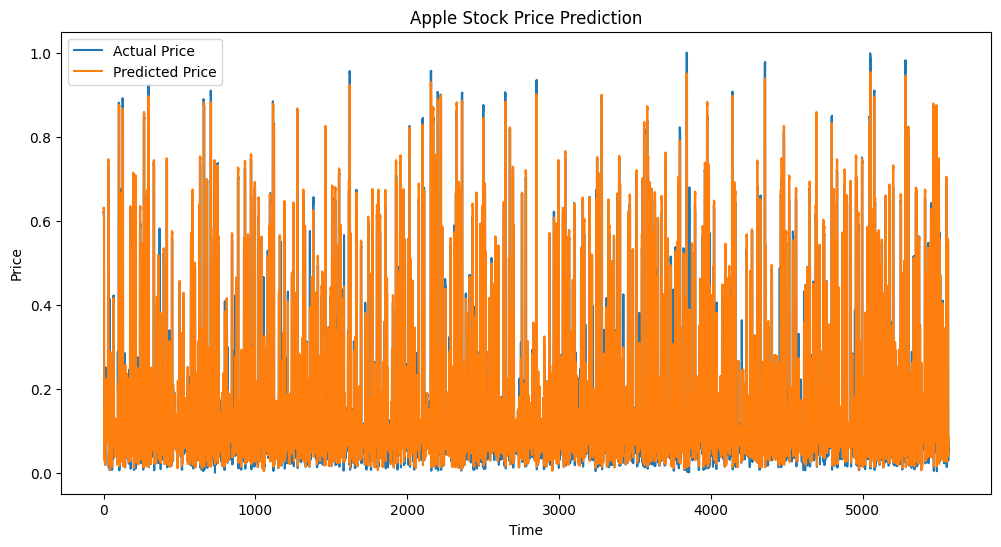

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled.flatten(), label='Actual Price')
plt.plot(predictions.flatten(), label='Predicted Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


Training vs Validation Loss Curve

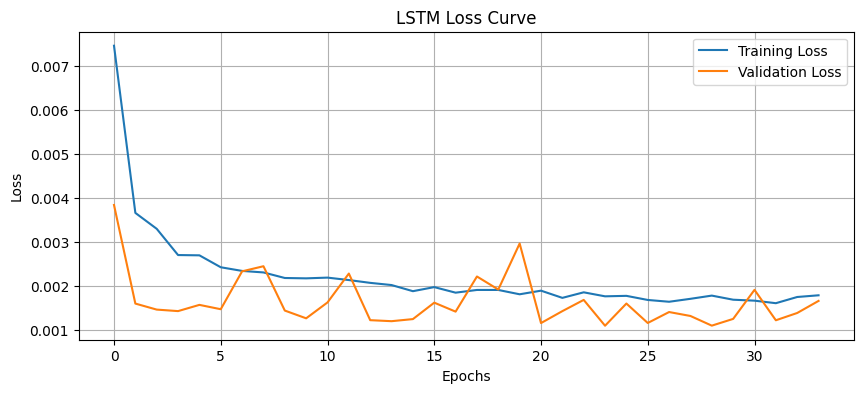

In [28]:
plt.figure(figsize=(10, 4))
plt.plot(lstm_model.history['loss'], label='Training Loss')
plt.plot(lstm_model.history['val_loss'], label='Validation Loss')
plt.title('LSTM Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


 Zoomed-in Comparison (Last 100 Predictions)

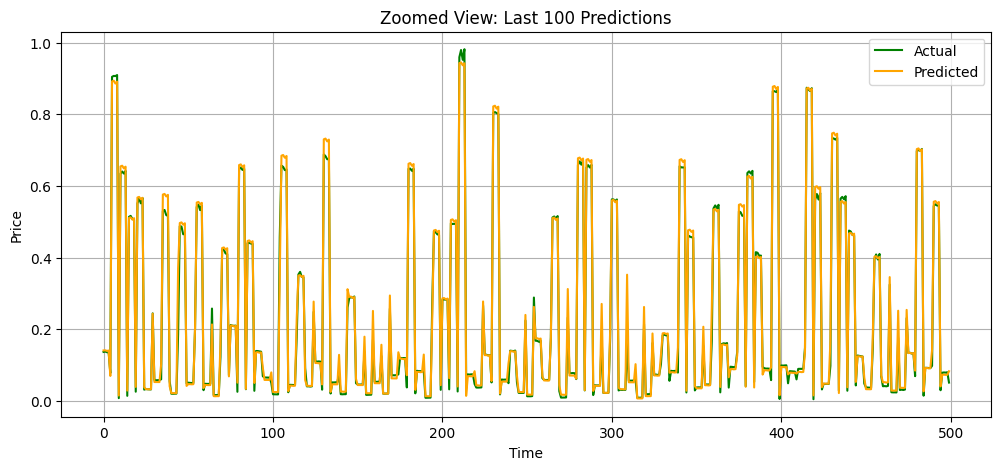

In [29]:
plt.figure(figsize=(12, 5))
plt.plot(y_test_rescaled[-100:].flatten(), label='Actual', color='green')
plt.plot(predictions[-100:].flatten(), label='Predicted', color='orange')
plt.title('Zoomed View: Last 100 Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Evaluation Metrics

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Flatten or reshape if needed
y_true = y_test_rescaled.flatten()
y_pred = predictions.flatten()

# Compute metrics
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

# Print metrics
print(f'MSE: {mse:.4f}, MAE: {mae:.4f}')


MSE: 0.0005, MAE: 0.0122
